In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2017_jun_final.csv')

In [3]:
df.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [4]:
print("Розмір таблиці:", df.shape)

Розмір таблиці: (8704, 25)


In [5]:
print("Типи стовпців:", df.dtypes)

Типи стовпців: N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary           

In [6]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Частка пропусків в кожному стовпці:")
print(missing_percentage)

Частка пропусків в кожному стовпці:
N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.00000

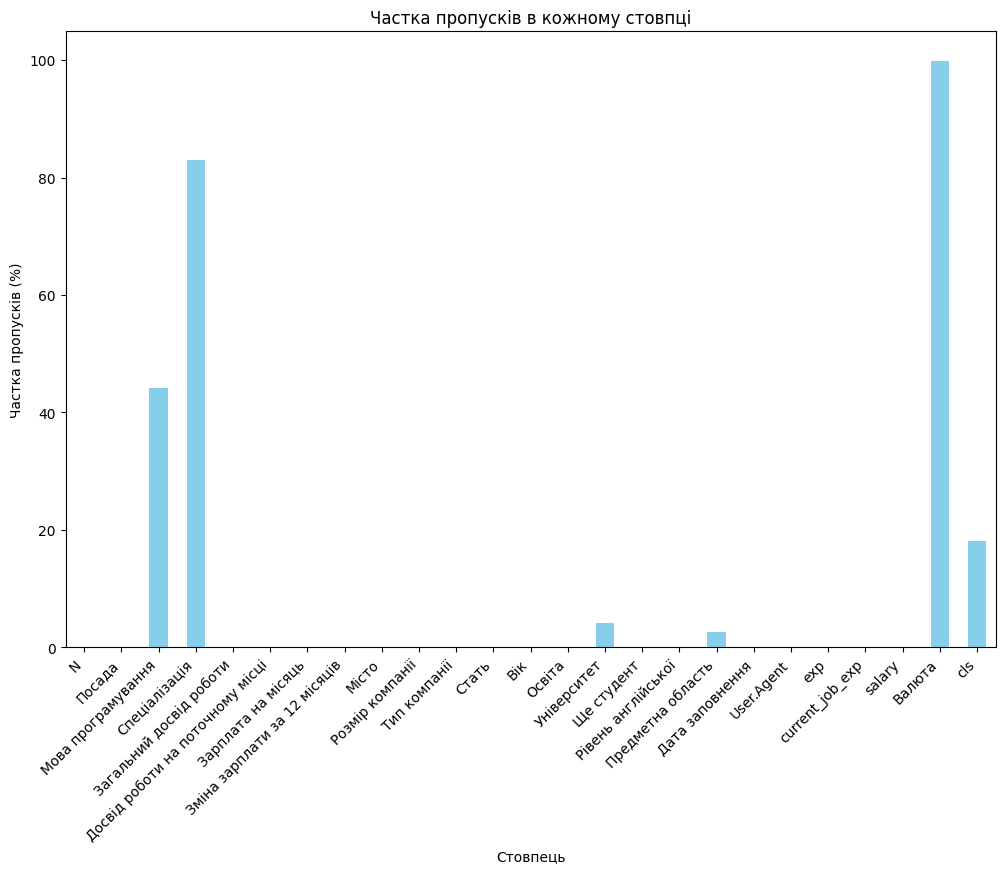

In [7]:
plt.figure(figsize=(12, 8))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Частка пропусків в кожному стовпці')
plt.xlabel('Стовпець')
plt.ylabel('Частка пропусків (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
df = df.dropna(subset=df.columns.difference(['Мова програмування', 'Валюта', 'Спеціалізація']))

In [9]:
missing_percentage_after_drop = (df.isnull().sum() / len(df)) * 100
print("Частка пропусків після видалення стовпців:")
print(missing_percentage_after_drop)

Частка пропусків після видалення стовпців:
N                                    0.000000
Посада                               0.000000
Мова програмування                  31.913315
Спеціалізація                       79.219237
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  

In [10]:
print(f"Новий розмір таблиці: {df.shape}")

Новий розмір таблиці: (6737, 25)


In [11]:
python_data = df.loc[df['Мова програмування'] == 'Python']

In [12]:
print(f"Розмір таблиці python_data: {python_data.shape}")

Розмір таблиці python_data: (198, 25)


In [13]:
grouped_data = df.groupby('Посада').agg({'Зарплата на місяць': ['min', 'max']})
grouped_data.columns = [f'{col[0]}_{col[1]}' for col in grouped_data.columns]

In [14]:
def fill_avg_salary(row):
    return (row['Зарплата на місяць_min'] + row['Зарплата на місяць_max']) / 2 if not pd.isna(row['Зарплата на місяць_min']) and not pd.isna(row['Зарплата на місяць_max']) else pd.NaT

grouped_data['avg'] = grouped_data.apply(fill_avg_salary, axis=1)
print("Описова статистика для нового стовпчика 'avg':")
print(grouped_data['avg'].describe())

Описова статистика для нового стовпчика 'avg':
count       14.000000
mean      4883.392857
std       4232.324176
min       1048.000000
25%       3203.750000
50%       3872.500000
75%       5016.500000
max      17750.000000
Name: avg, dtype: float64


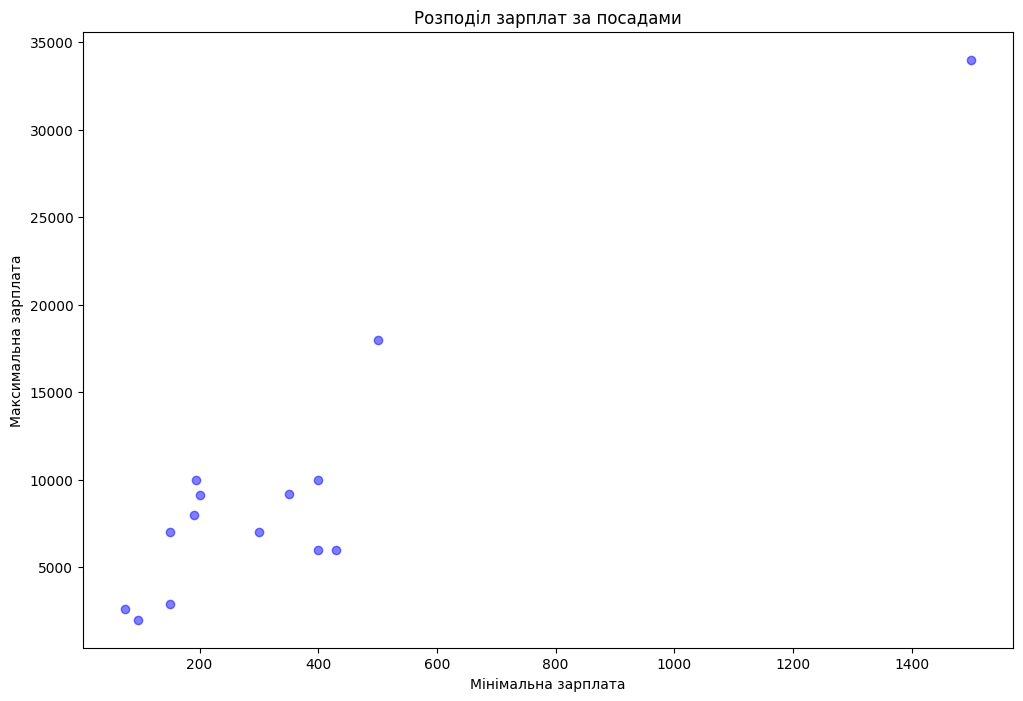

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(grouped_data['Зарплата на місяць_min'], grouped_data['Зарплата на місяць_max'], c='blue', alpha=0.5)
plt.title('Розподіл зарплат за посадами')
plt.xlabel('Мінімальна зарплата')
plt.ylabel('Максимальна зарплата')
plt.show()

In [16]:
grouped_data.to_csv('output_data.csv', index=False)